In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZooLLbLFnZYJtcZYL27I")
project = rf.workspace("elsoudy").project("card-hleyg")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 1.9 MB/s eta 0:00:00a 0:00:01
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to card-1 in yolov11:: 100%|██████████| 3323/3323 [00:00<00:00, 5867.63it/s]


In [2]:
# Define a function to write text to a file
def write_text_to_file(text, file_path):
    with open(file_path, 'w') as file:
        file.write(text)


text="""
names:
- Add1
- Add2
- Ex_d
- Ex_m
- Ex_y
- FN
- Face
- Gender
- Id
- Job
- Job2
- LN
- Marital_status
- Partner
- Religion
nc: 15

test: ../test/images
train: /kaggle/working/card-1/train/images
val: /kaggle/working/card-1/valid/images

"""

write_text_to_file(text, "output.yaml")

In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.25 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [4]:
# Train YOLOv8n on COCO8 for 15 epochs
!yolo task= detect mode= train data=/kaggle/working/output.yaml model=yolov10m.pt epochs=10 imgsz=640 batch=16

100%|███████████████████████████████████████| 32.1M/32.1M [00:00<00:00, 153MB/s]
Ultralytics 8.3.25 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov10m.pt, data=/kaggle/working/output.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_

In [5]:
from IPython.display import Image, display

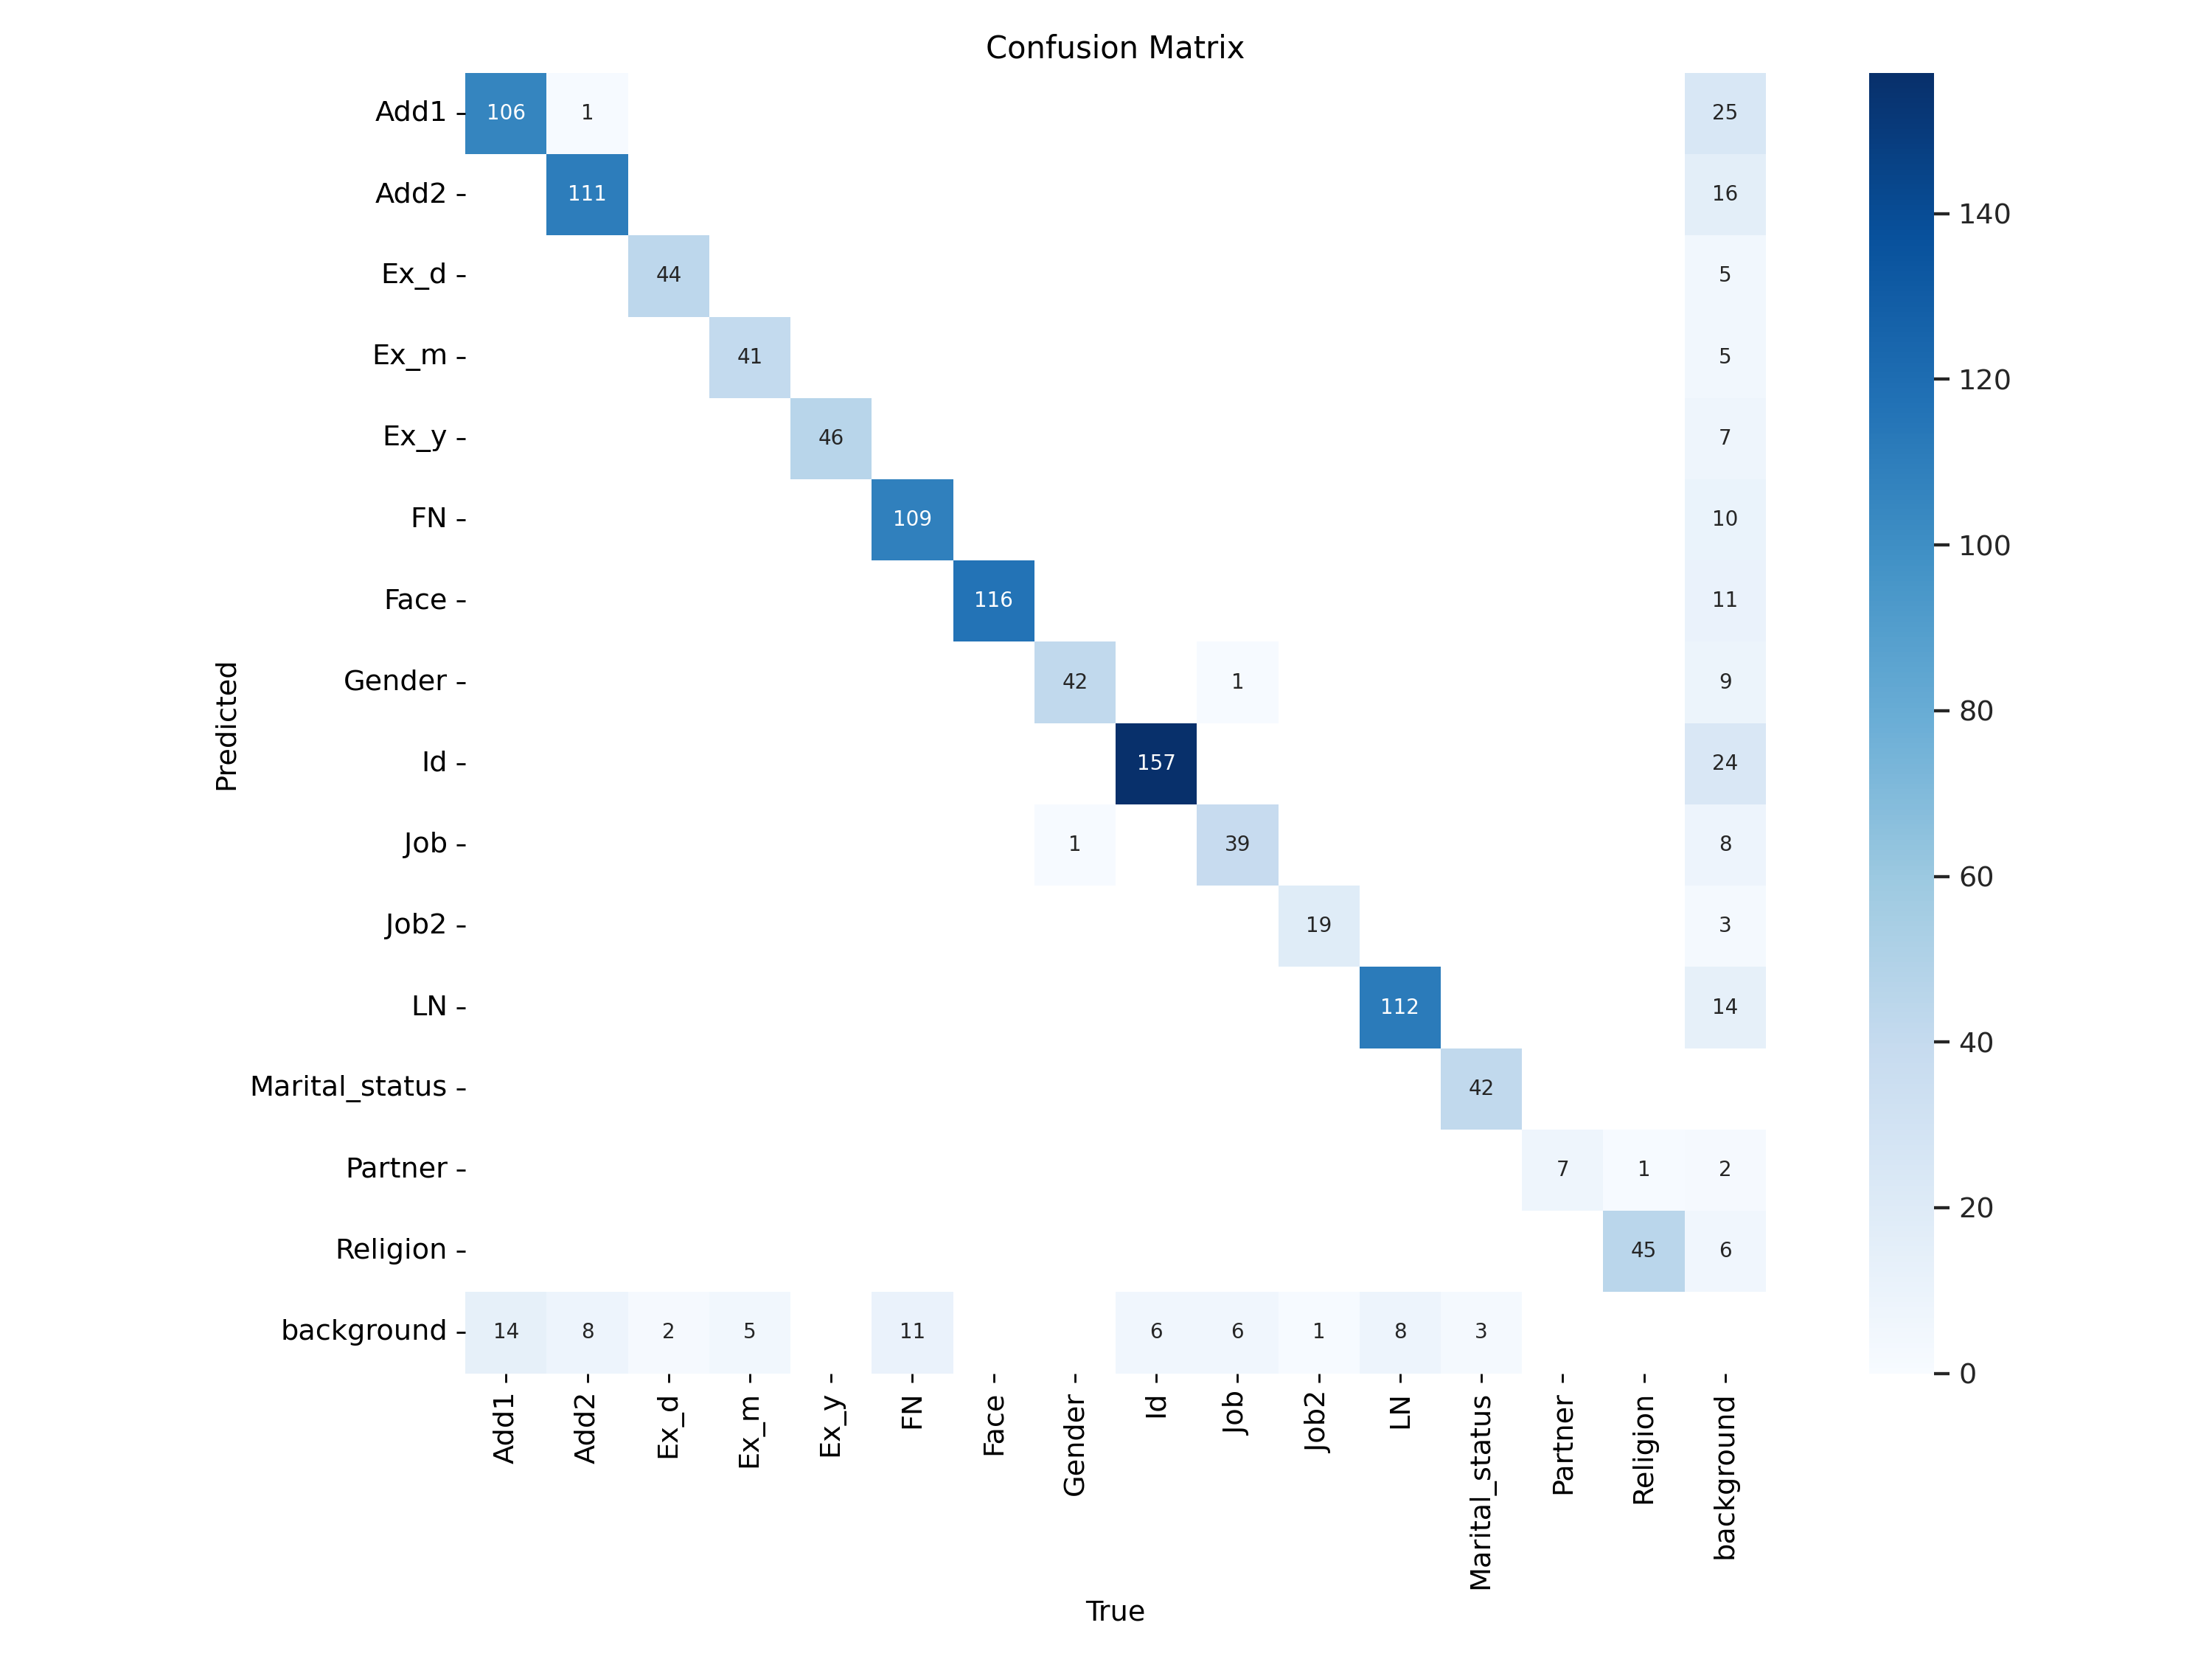

In [6]:
display(Image(filename=f"/kaggle/working/runs/detect/train/confusion_matrix.png", width=1000))

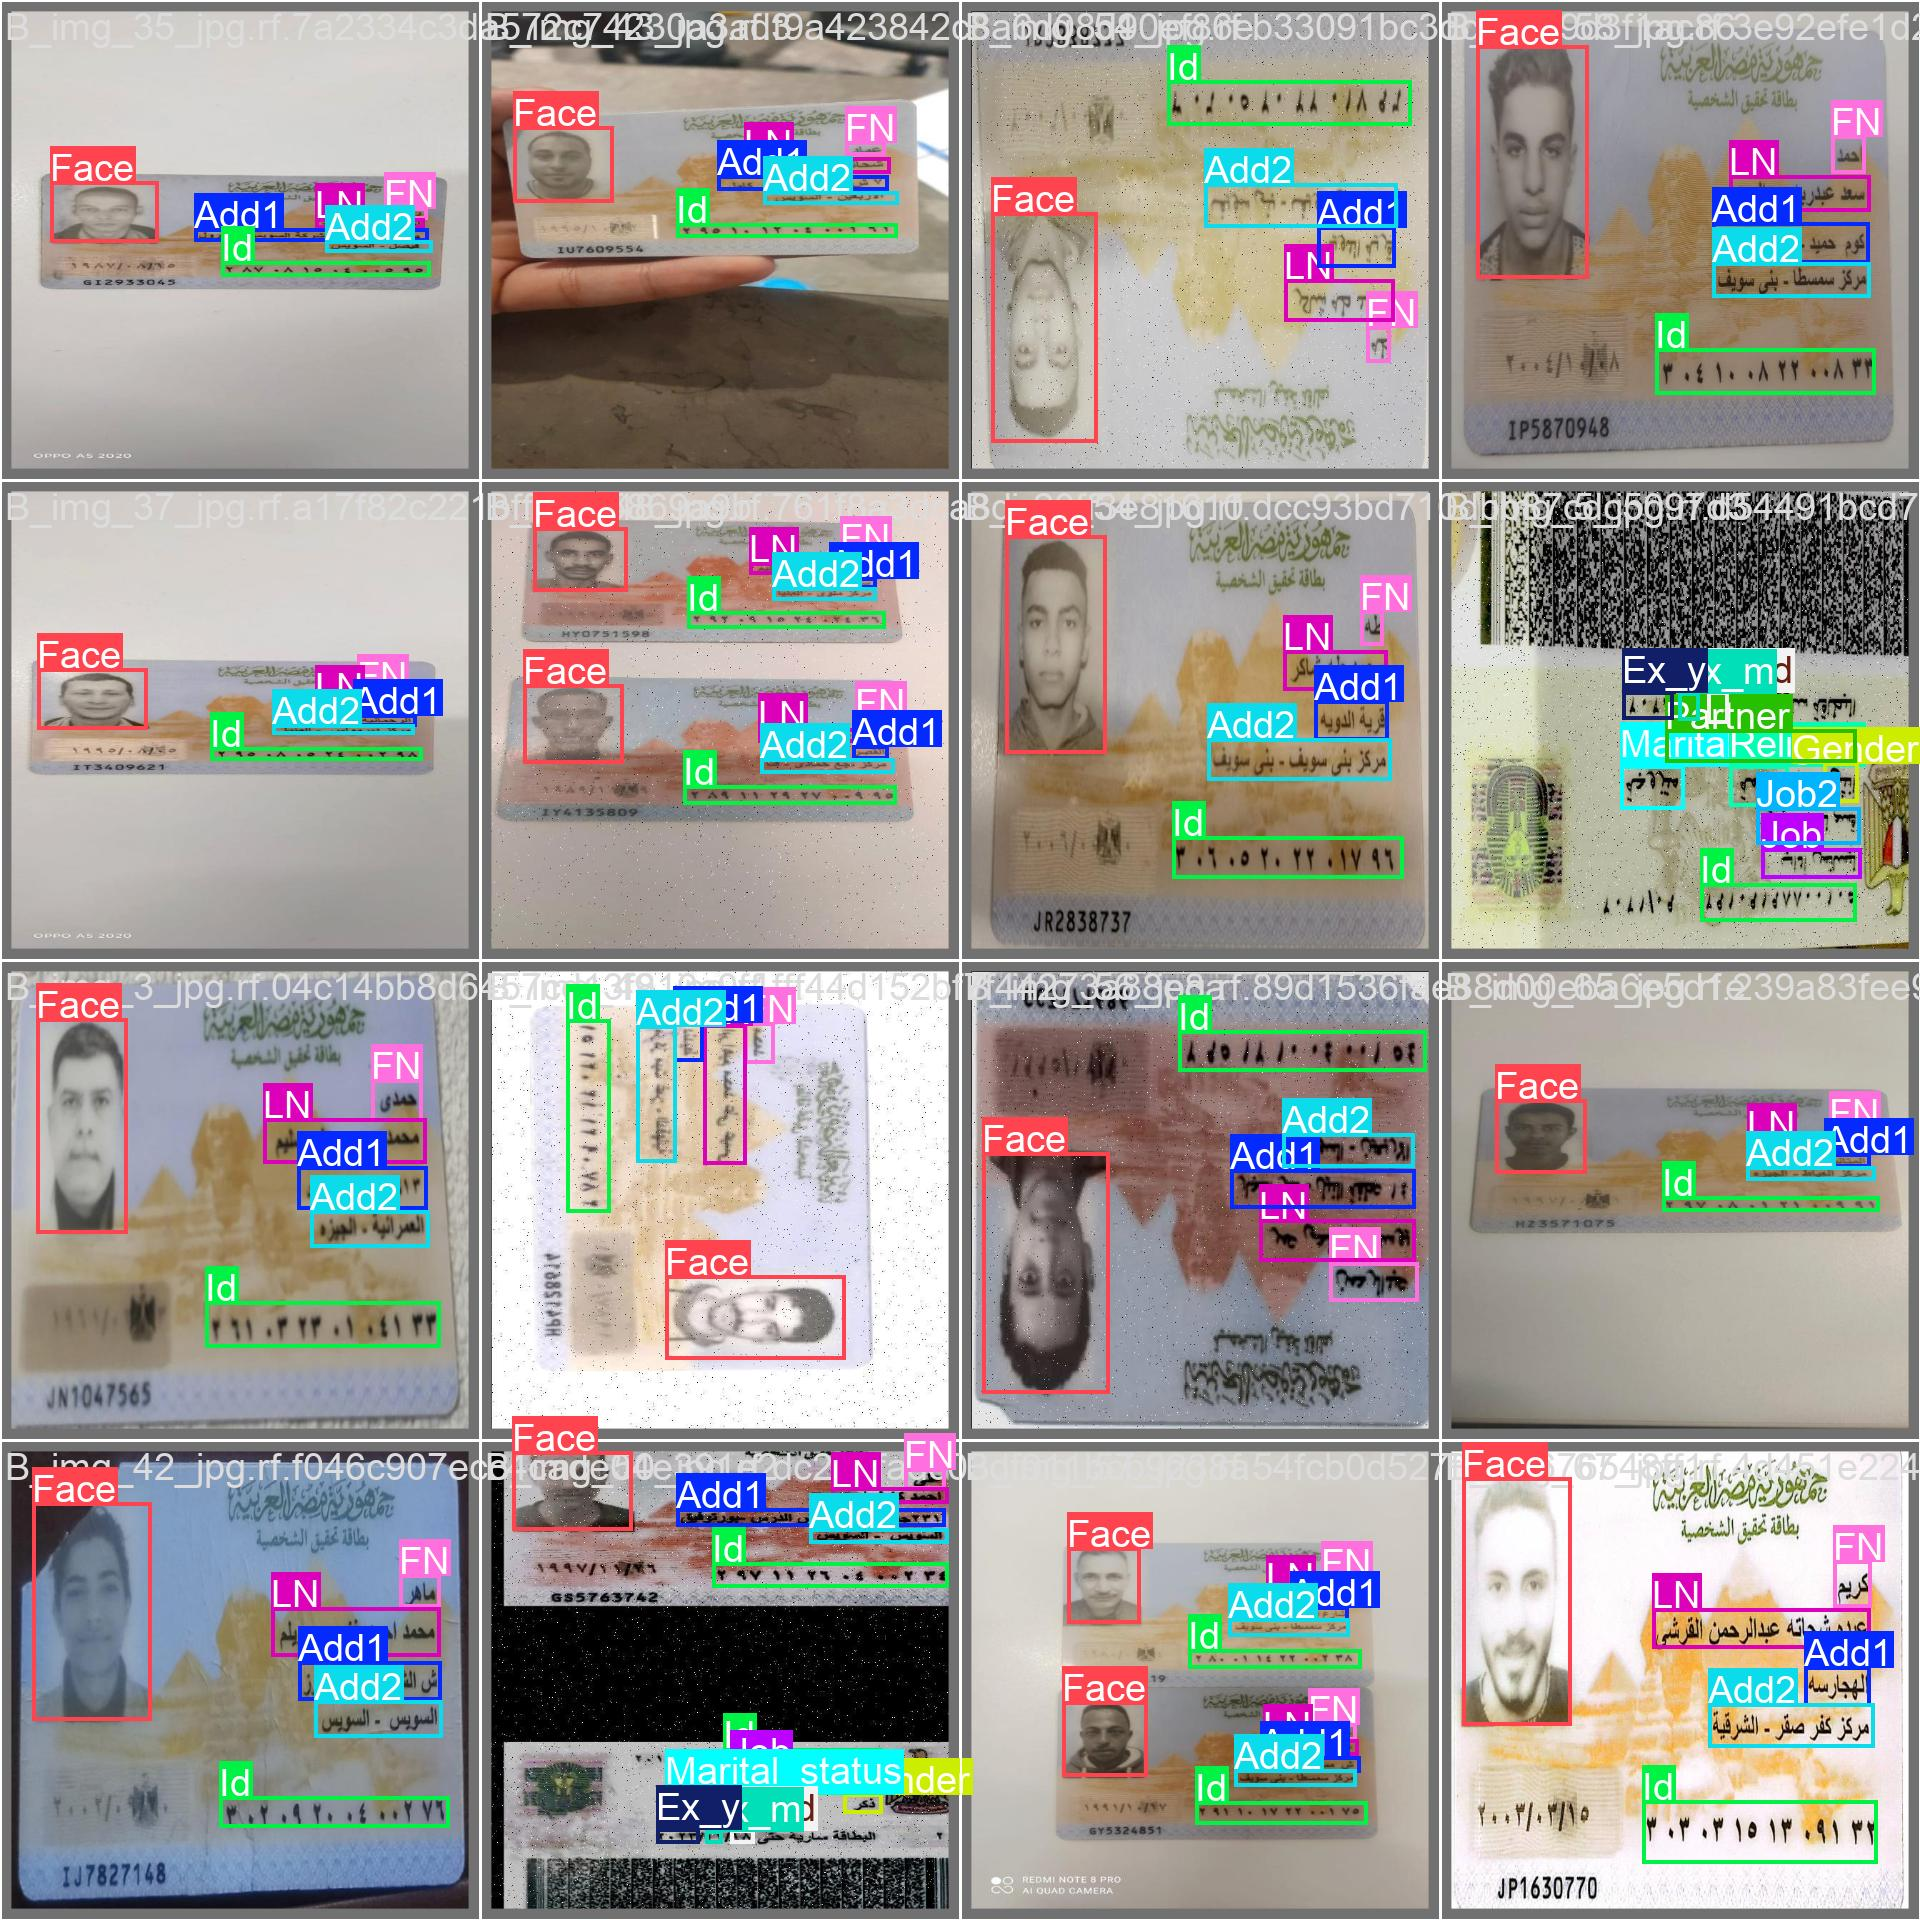

In [7]:
display(Image(filename=f"/kaggle/working/runs/detect/train/val_batch1_labels.jpg", width=1000))

In [8]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt imgsz=640 conf=0.5 \
source=/kaggle/working/card-1/valid/images

Ultralytics 8.3.25 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv10m summary (fused): 369 layers, 16,467,754 parameters, 0 gradients, 63.5 GFLOPs

image 1/127 /kaggle/working/card-1/valid/images/B_img_0_jpg.rf.20e27e17dfa58d929fa51076354dccc2.jpg: 640x640 1 Ex_d, 1 Ex_m, 1 Ex_y, 1 Gender, 1 Id, 1 Job, 1 Marital_status, 1 Partner, 1 Religion, 17.4ms
image 2/127 /kaggle/working/card-1/valid/images/B_img_0_jpg.rf.b8bb9146e99440d91b0c03483b2a51b2.jpg: 640x640 1 Ex_d, 1 Ex_m, 1 Ex_y, 1 Gender, 1 Id, 1 Job, 1 Marital_status, 1 Religion, 17.0ms
image 3/127 /kaggle/working/card-1/valid/images/B_img_102_jpg.rf.909e2de7fa1297837ec340ea442dda6b.jpg: 640x640 1 Add1, 2 Add2s, 1 Ex_y, 2 FNs, 2 Faces, 1 Gender, 4 Ids, 2 Jobs, 1 Job2, 2 LNs, 1 Marital_status, 1 Partner, 1 Religion, 16.9ms
image 4/127 /kaggle/working/card-1/valid/images/B_img_107_jpg.rf.fb2790f7d9fd23ef500203e63f66b5e7.jpg: 640x640 1 Add1, 1 Add2, 1 Ex_d, 1 Ex_y, 1 FN, 1 Face, 1 Gender, 2 Ids, 1 Job2, 1 LN, 

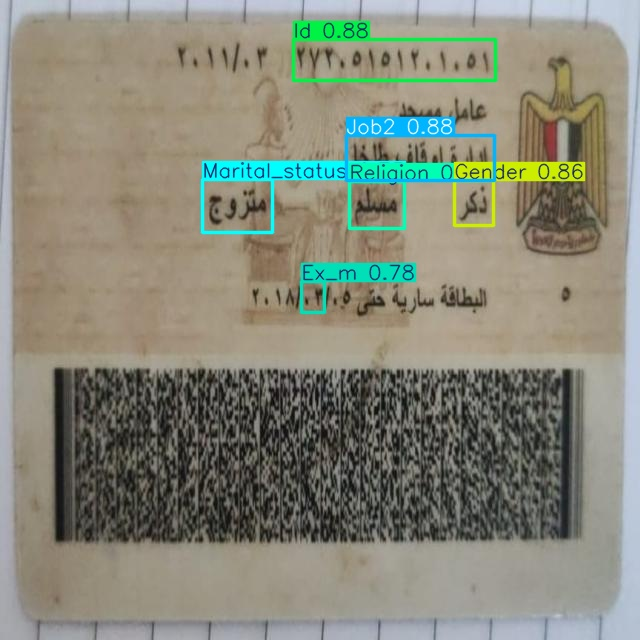

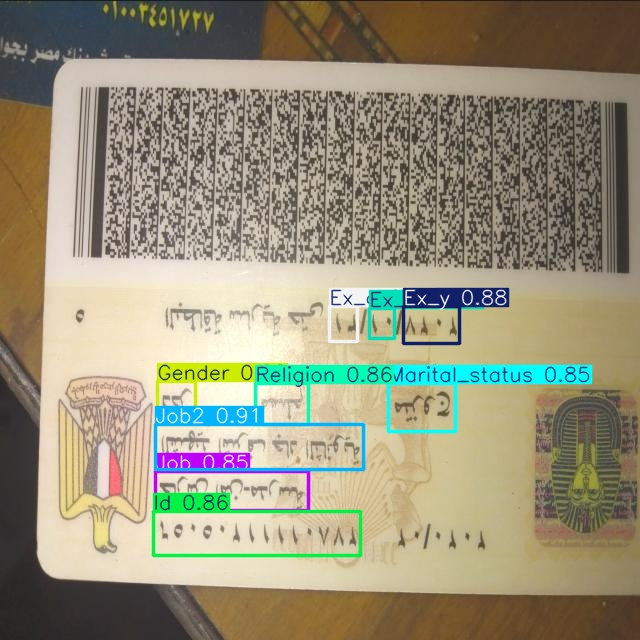

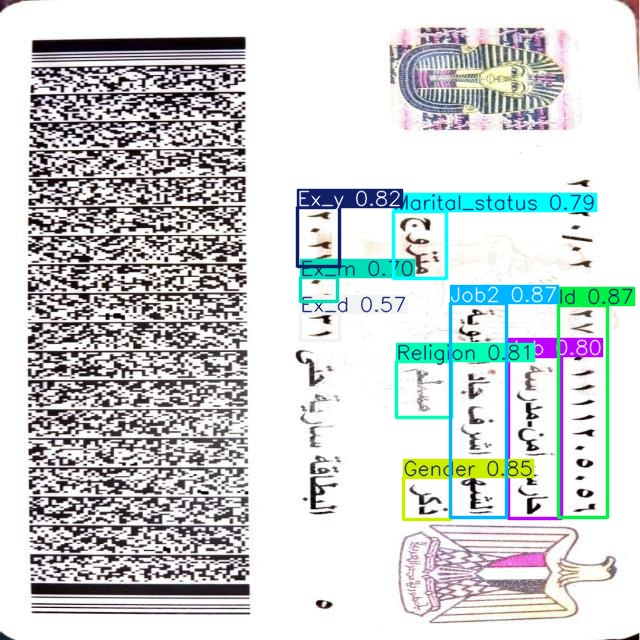

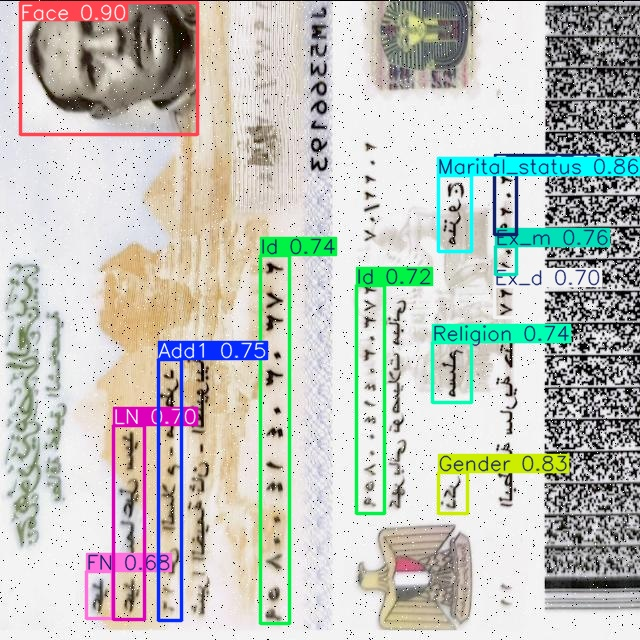

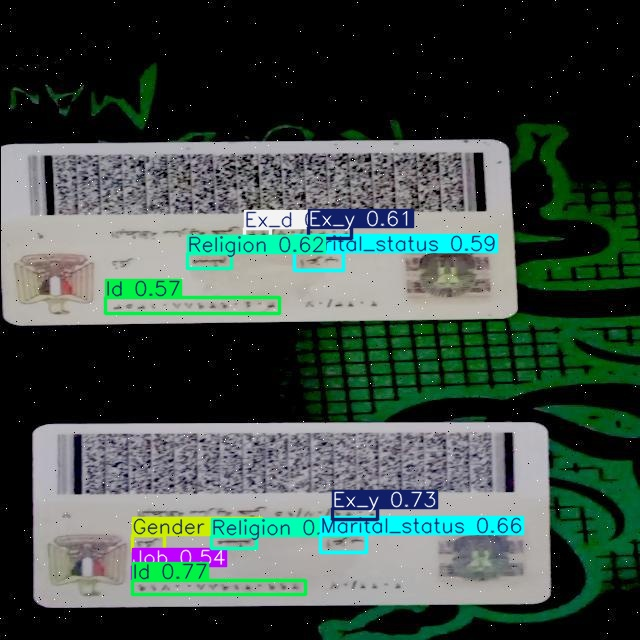

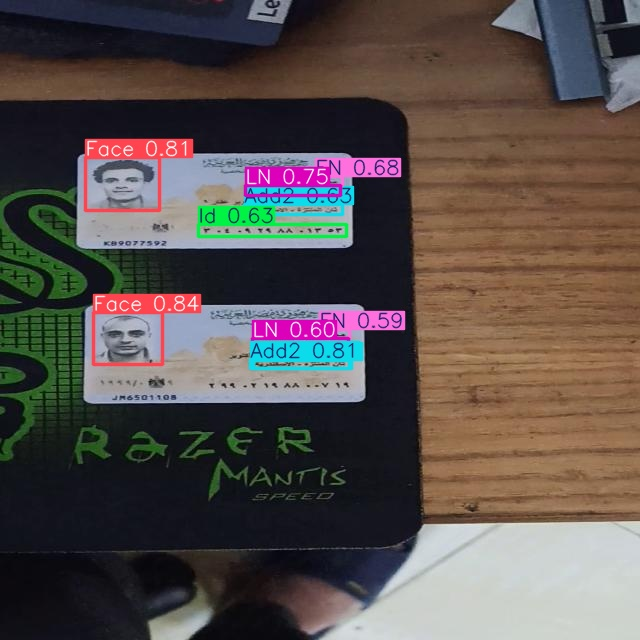

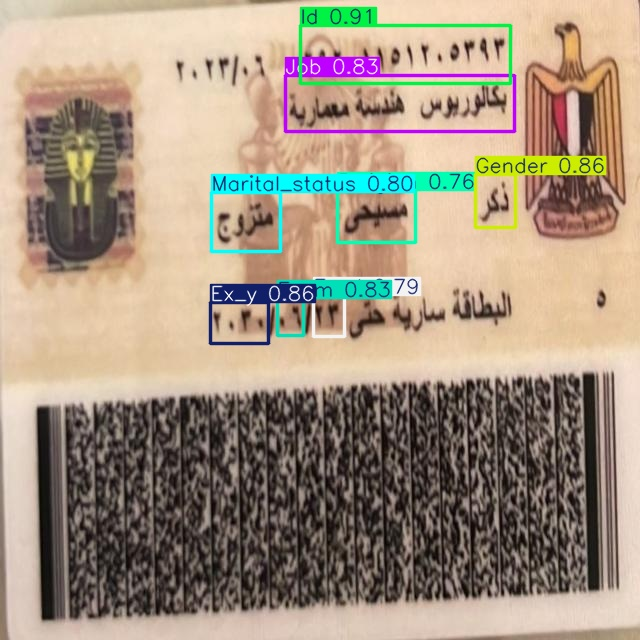

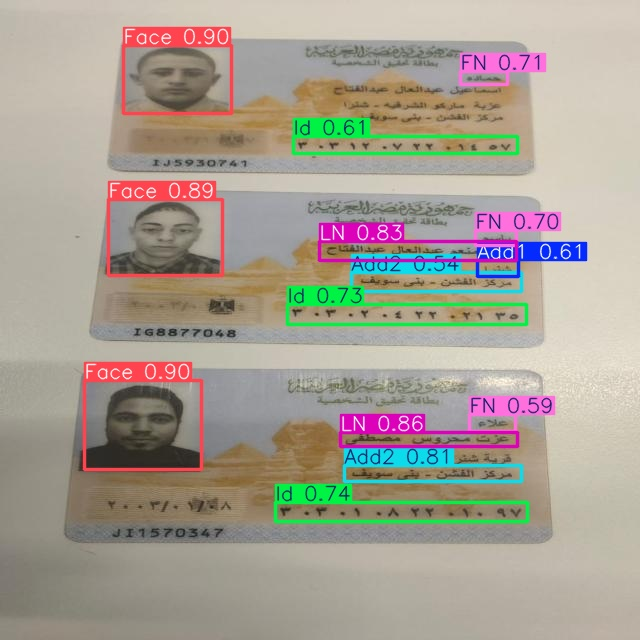

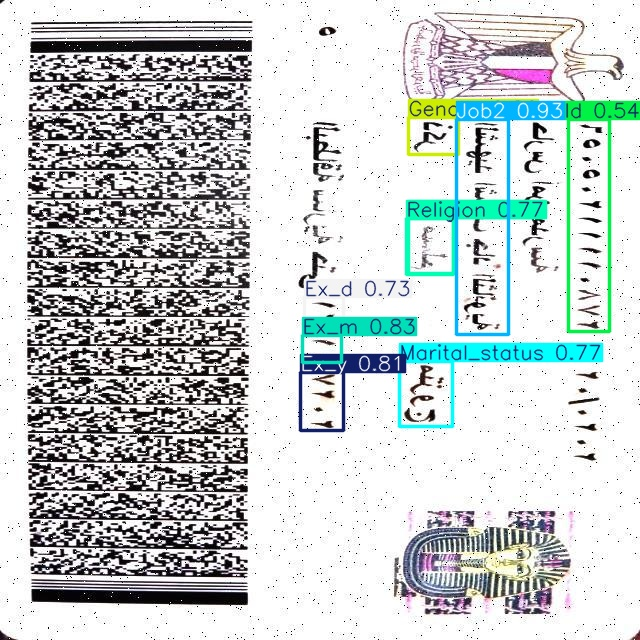

In [9]:
# Display inference on ALL test images
import glob
from IPython.display import Image, display
i = 0
for imageName in glob.glob("/kaggle/working/runs/detect/predict/*.jpg"): #assuming JPG
    if i %15 ==0 :
        print("\n")
        display(Image(filename=imageName))
    i = i +1